#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 10 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import StandardScaler

#**Question-1**

##Input the dataset.

In [116]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-10/spambase.data", sep = ',', header = None, names=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "target"])
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [117]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [119]:
scaler = StandardScaler()
for i in data.columns:
    if(i == 'target'):
        continue
    else:
        data[[i]] = scaler.fit_transform(data[[i]])
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672880,-0.165072,0.673183,-0.0469,-0.464314,0.781971,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110,0
4597,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165,0
4598,0.640128,-0.165072,0.038373,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,0.260533,2.141746,-0.155198,-0.329912,-0.308355,-0.103048,-0.119382,-0.236941,-0.272628,0
4599,2.801763,-0.165072,-0.556761,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.303450,-0.155198,-0.329912,-0.308355,-0.103048,-0.127483,-0.242073,-0.338604,0


In [120]:
X = data.iloc[:,0:56]
y = data['target']
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.30)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (3220, 56)
x_test: (1381, 56)
y_train: (3220,)
y_test: (1381,)


##**i.** You have to use each of the following three kernel functions
###(a) Linear


In [121]:
linear_SVC = LinearSVC() 
linear_SVC.fit(x_train, y_train)
predicted = linear_SVC.predict(x_test)
accSVCLinear = acc(y_test, predicted)*100
print("Accuracy:", str(accSVCLinear)+"%")

Accuracy: 91.81752353367125%


###(b) Quadratic


In [122]:
quadratic_SVC = SVC(kernel='poly', degree=2) 
quadratic_SVC.fit(x_train, y_train)
predicted = quadratic_SVC.predict(x_test)
accSVCQuadratic = acc(y_test, predicted)*100
print("Accuracy:", str(accSVCQuadratic)+"%")

Accuracy: 83.2005792903693%


###(c) RBF

In [123]:
rbf_SVC = SVC(kernel='rbf') 
rbf_SVC.fit(x_train, y_train)
predicted = rbf_SVC.predict(x_test)
accSVCRBF = acc(y_test, predicted)*100
print("Accuracy:", str(accSVCRBF)+"%")

Accuracy: 93.33816075307749%


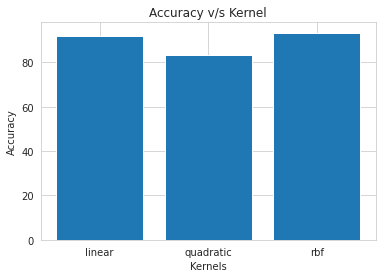

In [124]:
Dict = {}
Dict['linear'] = accSVCLinear
Dict['quadratic'] = accSVCQuadratic
Dict['rbf'] = accSVCRBF

names = list(Dict.keys())
values = list(Dict.values())

plt.bar(range(len(Dict)), values, tick_label=names)
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Kernel")
plt.show()
plt.show()

##**ii.** For each of the kernels, you have to report training and test set classification accuracy for the best value of generalization constant C. The best C value is the one which provides the best test set accuracy that you have found out by trial of different values of C. Report accuracies in the form of a comparison table, along with the values of C.

###(a) Linear

In [125]:
from sklearn.svm import LinearSVC

In [126]:
c_list_lin = []
train_acc_list_lin = []
test_acc_list_lin = []
for i in range(1, 101):
    c = float(i)/100
    c_list_lin.append(c)
    linear_SVC = LinearSVC(C=c) 
    linear_SVC.fit(x_train, y_train)
    # Training Accuracy
    predicted = linear_SVC.predict(x_train)
    train_acc_list_lin.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test = linear_SVC.predict(x_test)
    test_acc_list_lin.append(acc(y_test, predicted_test)*100)

In [127]:
lst_lin = zip(c_list_lin, train_acc_list_lin, test_acc_list_lin)
df_linear = pd.DataFrame(lst_lin, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_linear

,C,Training Accuracy,Testing Accuracy
0,0.01,91.739130,92.107169
1,0.02,92.204969,92.251991
2,0.03,92.236025,92.179580
3,0.04,92.204969,92.179580
4,0.05,92.236025,92.179580
...,...,...,...
95,0.96,92.298137,91.962346
96,0.97,92.360248,91.889935
97,0.98,92.329193,91.817524
98,0.99,92.111801,91.745112


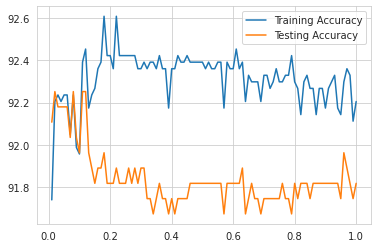

In [128]:
plt.plot(c_list_lin, train_acc_list_lin, label = "Training Accuracy")
plt.plot(c_list_lin, test_acc_list_lin, label = "Testing Accuracy")
plt.legend()
plt.show()

In [129]:
c_list_lin2 = []
train_acc_list_lin2 = []
test_acc_list_lin2 = []
L = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in L:
    c = i
    c_list_lin2.append(c)
    linear_SVC = LinearSVC(C=c) 
    linear_SVC.fit(x_train, y_train)
    # Training Accuracy
    predicted = linear_SVC.predict(x_train)
    train_acc_list_lin2.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test = linear_SVC.predict(x_test)
    test_acc_list_lin2.append(acc(y_test, predicted_test)*100)

In [130]:
lst_lin2 = zip(c_list_lin2, train_acc_list_lin2, test_acc_list_lin2)
df_linear = pd.DataFrame(lst_lin2, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_linear

,C,Training Accuracy,Testing Accuracy
0,0.001,90.217391,90.586531
1,0.010,91.739130,92.107169
2,0.100,92.173913,92.251991
3,1.000,92.111801,91.745112
4,10.000,92.639752,92.034757
5,100.000,89.844720,89.500362
6,1000.000,86.614907,87.545257


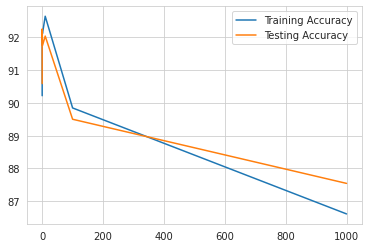

In [131]:
plt.plot(c_list_lin2, train_acc_list_lin2, label = "Training Accuracy")
plt.plot(c_list_lin2, test_acc_list_lin2, label = "Testing Accuracy")
plt.legend()
plt.show()

###(b) Quadratic


In [132]:
c_list_quad = []
train_acc_list_quad = []
test_acc_list_quad = []
for i in range(1, 101):
    c = i/100
    c_list_quad.append(c)
    quadratic_SVC = SVC(kernel='poly', C=c, degree=2) 
    quadratic_SVC.fit(x_train, y_train)
    # Training Accuracy
    predicted = quadratic_SVC.predict(x_train)
    train_acc_list_quad.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test= quadratic_SVC.predict(x_test)
    test_acc_list_quad.append(acc(y_test, predicted_test)*100)

In [133]:
lst_quad = zip(c_list_quad, train_acc_list_quad, test_acc_list_quad)
df_quad = pd.DataFrame(lst_quad, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_quad

,C,Training Accuracy,Testing Accuracy
0,0.01,62.422360,60.970311
1,0.02,65.217391,63.577118
2,0.03,66.459627,64.880521
3,0.04,67.453416,65.821868
4,0.05,69.006211,67.487328
...,...,...,...
95,0.96,84.503106,82.910934
96,0.97,84.565217,82.910934
97,0.98,84.596273,83.200579
98,0.99,84.627329,83.200579


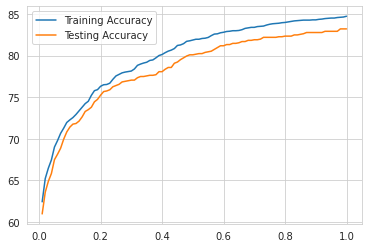

In [134]:
plt.plot(c_list_quad, train_acc_list_quad, label = "Training Accuracy")
plt.plot(c_list_quad, test_acc_list_quad, label = "Testing Accuracy")
plt.legend()
plt.show()

In [135]:
c_list_quad2 = []
train_acc_list_quad2 = []
test_acc_list_quad2 = []
L = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in L:
    c = i
    c_list_quad2.append(c)
    quadratic_SVC = SVC(kernel='poly', C=c, degree=2) 
    quadratic_SVC.fit(x_train, y_train)
    # Training Accuracy
    predicted = quadratic_SVC.predict(x_train)
    train_acc_list_quad2.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test= quadratic_SVC.predict(x_test)
    test_acc_list_quad2.append(acc(y_test, predicted_test)*100)

In [136]:
lst_quad2 = zip(c_list_quad2, train_acc_list_quad2, test_acc_list_quad2)
df_quad = pd.DataFrame(lst_quad2, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_quad

,C,Training Accuracy,Testing Accuracy
0,0.001,61.055901,59.884142
1,0.010,62.422360,60.970311
2,0.100,72.267081,71.397538
3,1.000,84.720497,83.200579
4,10.000,94.596273,90.658943
5,100.000,96.894410,91.527878
6,1000.000,98.571429,91.962346


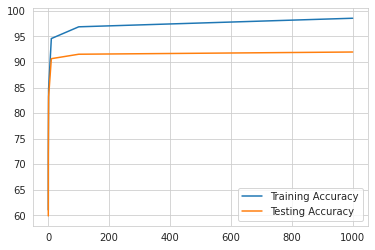

In [137]:
plt.plot(c_list_quad2, train_acc_list_quad2, label = "Training Accuracy")
plt.plot(c_list_quad2, test_acc_list_quad2, label = "Testing Accuracy")
plt.legend()
plt.show()

###(c) RBF

In [138]:
c_list_rbf = []
train_acc_list_rbf = []
test_acc_list_rbf = []
for i in range(1,101):
    c = float(i)/100
    c_list_rbf.append(c)
    rbf_model = SVC(kernel='rbf', C=c) 
    rbf_model.fit(x_train, y_train)
    # Training Accuracy
    predicted = rbf_model.predict(x_train)    
    train_acc_list_rbf.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test= rbf_model.predict(x_test)
    test_acc_list_rbf.append(acc(y_test, predicted_test)*100)

In [139]:
lst_rbf = zip(c_list_rbf, train_acc_list_rbf, test_acc_list_rbf)
df_rbf = pd.DataFrame(lst_rbf, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_rbf

,C,Training Accuracy,Testing Accuracy
0,0.01,70.527950,70.311369
1,0.02,85.807453,85.952209
2,0.03,88.012422,88.196959
3,0.04,88.726708,89.138306
4,0.05,89.223602,90.441709
...,...,...,...
95,0.96,94.658385,93.410572
96,0.97,94.658385,93.410572
97,0.98,94.658385,93.410572
98,0.99,94.627329,93.338161


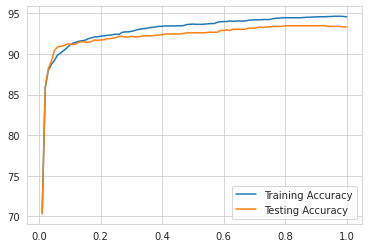

In [140]:
plt.plot(c_list_rbf, train_acc_list_rbf, label = "Training Accuracy")
plt.plot(c_list_rbf, test_acc_list_rbf, label = "Testing Accuracy")
plt.legend()
plt.show()

In [141]:
c_list_rbf3 = []
train_acc_list_rbf3 = []
test_acc_list_rbf3 = []
L = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in L:
    c = i
    c_list_rbf3.append(c)
    rbf_model = SVC(kernel='rbf', C=c) 
    rbf_model.fit(x_train, y_train)
    # Training Accuracy
    predicted = rbf_model.predict(x_train)    
    train_acc_list_rbf3.append(acc(y_train, predicted)*100)
    # Testing Accuracy
    predicted_test= rbf_model.predict(x_test)
    test_acc_list_rbf3.append(acc(y_test, predicted_test)*100)

In [142]:
lst_rbf2 = zip(c_list_rbf3, train_acc_list_rbf3, test_acc_list_rbf3)
df_rbf = pd.DataFrame(lst_rbf2, columns = ['C', 'Training Accuracy', 'Testing Accuracy'])
df_rbf

,C,Training Accuracy,Testing Accuracy
0,0.001,60.900621,59.884142
1,0.010,70.527950,70.311369
2,0.100,91.118012,91.238233
3,1.000,94.596273,93.338161
4,10.000,96.645963,93.917451
5,100.000,98.509317,92.686459
6,1000.000,99.347826,91.455467


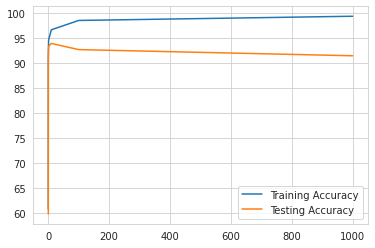

In [143]:
plt.plot(c_list_rbf3, train_acc_list_rbf3, label = "Training Accuracy")
plt.plot(c_list_rbf3, test_acc_list_rbf3, label = "Testing Accuracy")
plt.legend()
plt.show()